**ECSE 422 Project**

**Team Members:**

*   Shabthana Kandasamy - 260927788
*   Ping Gu - 260446005
*   Rambod Azimi - 260911967

**Part 1: Exhaustive Enumeration**

**Implementation**

1.   Read the input text file, extract information, and store to their corresponding variables (*N, reliability_matrix, cost_matrix*). To do so, we have implemented a function called *read_numbers_from_file()* which takes a filename as input, reads the file line by line, ignores lines starting with # (comments), extracts N from the first line, reads the remaining numbers into a list, and finally stores the values in their corresponding variables.

2.   Determine all possible network combinations by generating binary numbers with N*(N-1)/2 *italicized text* bits. Given N nodes, we can have 2^(N*(N-1)/2) *italicized text* possible combinations. Therefore, a binary number with that number of digits could cover all possible combinations. We do so by implementing the *generate_binary_numbers()* function. We store all combinations in the *binary_numbers* list.

3. Not all possible combinations are feasible. For example, some combinations do not result in a connected network. To eliminate these combinations, we check whether the created network is connected or not. First, we convert each binary number (representing an *edge list*) into an *adjacency list* by calling the function *binary_to_adjacency()*. This function returns a list called *adj_matrix*, which is then used as input for another function named *is_connected()*. The is_connected() function runs the *Depth-First Search* (DFS) algorithm to determine whether the connected components can traverse all the nodes within the network or not.

4. We iterate over all possible combinations (*binary_numbers*) and eliminate ones that are not connected, and store the remaining to another list called *connected_numbers*.

5. We further eliminate combinations that exceed the cost limit. Given an integer number *cost_limit*, we calculate the total cost of the network using the *calculate_total_cost()* function. If the calculated cost exceeds the cost limit, we remove the combination from the list. This is achieved by iterating over each digit of each remaining binary number, adding the corresponding cost if the digit is '1'. The remaining combinations are then stored in a new list called *feasible_numbers*.

6. Now that we have a set of all possible networks that are both connected and do not exceed the cost limit, represented by their binary numbers (feasible_numbers), we start calculating the reliability of each network in order to find the highest reliability. To do so, we implement the following functions:

*   *calculate_single_reliability()*: Given a network represented by its binary number, we calculate the reliability by multiplying the edges that are connected in the graph. This function is used only when our network is a spanning tree (with no redundancy), so that the total reliability is a simple multiplication of all edge reliabilities.

*   *calculate_reliability()*: Given a network represented by its binary number, we calculate the reliability by considering redundancies as well. If there's only one redundancy (i.e., the number of edges = N), we use *generate_variations()* to generate any possible sub-network from that network that is still possible. By combining all those generated sub-networks and summing up the reliability values, we calculate the total reliability of that network with one redundancy.

*   *generate_variations()*: Given a network (represented by its binary edge list), generate all possible sub-networks with 1 edge less.

*   *generate_variations_all()*: Given a network represented by its binary edge list, we aim to generate all possible sub-networks with two or more edges removed. We achieve this by recursively calling the function on each generated variation until we have combined all possible sub-networks while respecting the connectivity constraint. Then, we flatten the list, remove any duplicates, and return the final result.

7. We store the calculated reliabilities in a list named *reliabilities*.

8. We find the highest reliability by sorting the reliabilities list and returning the first element.

9. Finally, we print important results for the network design.

10. For the interesting feature, we implement a simple GUI representation of the selected newrork graph with the highest reliability.


In [15]:
# This function reads the input files and stores the information into their corresponding variables
def read_numbers_from_file(filename):
  numbers = []

  with open(filename, 'r') as file:
    lines = file.readlines()

    # Filter out comment lines and strip whitespace
    lines = [line.strip() for line in lines if not line.strip().startswith("#")]

    # Extract N from the first line
    N = int(lines[0])

    # Read the remaining numbers into the list
    for line in lines[1:]:
      numbers.extend(map(float, line.split()))

  # Create 2 lists for storing reliability and cost values
  reliability_matrix = []
  cost_matrix = []

  # Iterate over all values and store them into the lists
  for i in range(N*(N-1)//2):
    reliability_matrix.append(numbers[i])
    cost_matrix.append(numbers[(N*(N-1)//2) + i])

  return N, reliability_matrix, cost_matrix

filename = "6_city.txt"
N, reliability_matrix, cost_matrix = read_numbers_from_file(filename)
# Maximum cost for the network
cost_limit = 10000

print("N:", N)
print("Reliability Matrix:", reliability_matrix)
print("Cost Matrix:", cost_matrix)

N: 6
Reliability Matrix: [0.94, 0.91, 0.96, 0.93, 0.92, 0.94, 0.97, 0.91, 0.92, 0.94, 0.9, 0.94, 0.93, 0.96, 0.91]
Cost Matrix: [10.0, 25.0, 10.0, 20.0, 30.0, 10.0, 10.0, 25.0, 20.0, 20.0, 40.0, 10.0, 20.0, 10.0, 30.0]


In [ ]:
# This function generates a list of binary digit representing edge lists
def generate_binary_numbers(n):
    max_num = 2 ** (n * (n - 1) // 2)
    binary_numbers = []
    for i in range(max_num):
        binary_numbers.append(bin(i)[2:].zfill(n * (n - 1) // 2))
    return binary_numbers

binary_numbers = generate_binary_numbers(N)
print(f"{len(binary_numbers)} possible combinations when N = {N}.")

32768 possible combinations when N = 6.


In [ ]:
# This function converts the edge matrix (binary representation) into an adjacency matrix
def binary_to_adjacency(binary_digit):
    n = N
    adjacency_matrix = [[0] * n for _ in range(n)]  # Initialize adjacency matrix with zeros
    idx = 0
    for i in range(n):
        for j in range(i+1, n):
            adjacency_matrix[i][j] = int(binary_digit[idx])  # Fill upper triangular part
            adjacency_matrix[j][i] = int(binary_digit[idx])  # Fill lower triangular part (graph is undirected)
            idx += 1
    return adjacency_matrix

# This function determines if a network (represented by its adjacency matrix) is connected or not
def is_connected(adj_matrix):
    def dfs(node, visited):
        visited[node] = True
        for neighbor, connected in enumerate(adj_matrix[node]):
            if connected and not visited[neighbor]:
                dfs(neighbor, visited)

    n = len(adj_matrix)
    visited = [False] * n
    dfs(0, visited)

    # If any node remains unvisited, the graph is not connected
    return all(visited)

In [ ]:
# Out of all possible combinations we have for network design, some of them are infeasible as the network would not be connected.
# Therefore, we eliminate those combinations that do not make a connected network

connected_numbers = [] # Valid combinations that create a connected network
for binary in binary_numbers:
  adj_matrix = binary_to_adjacency(binary)
  if (is_connected(adj_matrix)):
    connected_numbers.append(binary)

print(f"{len(connected_numbers)} possible combinations out of {len(binary_numbers)} total combinations are connected.")

38 possible combinations out of 64 total combinations are connected.


In [ ]:
# Eliminate combinations that exceed the cost limit
# This function calculates the total cost of a given network
def calculate_total_cost(binary):
  total_cost = 0
  for digit in range(len(binary)):
    if binary[digit] == "1":
      total_cost += cost_matrix[digit]
  return total_cost

feasible_numbers = []
for binary in connected_numbers:
  cost = calculate_total_cost(binary)
  if cost <= cost_limit:
    feasible_numbers.append(binary)

print(f"{len(feasible_numbers)} possible combinations out of {len(binary_numbers)} total combinations are feasible (connected and cost <= {cost_limit})")

NameError: name 'connected_numbers' is not defined

In [ ]:
# This will print all the feasible networks respecting both connectiveness and cost limit
for binary in feasible_numbers:
  print(f"{binary} has a total cost of {calculate_total_cost(binary)}")

001011 has a total cost of 40.0
001101 has a total cost of 45.0
001110 has a total cost of 35.0
010011 has a total cost of 50.0
010110 has a total cost of 45.0
011010 has a total cost of 40.0
011100 has a total cost of 45.0
100011 has a total cost of 45.0
100101 has a total cost of 50.0
100110 has a total cost of 40.0
101001 has a total cost of 45.0
101100 has a total cost of 40.0
101110 has a total cost of 50.0
110010 has a total cost of 45.0
111000 has a total cost of 45.0


In [ ]:
# Given a network (represented by its binary edge list), generate all possible sub-networks with 1 edge less
def generate_variations(binary_str):
    variations = [binary_str]

    for i in range(len(binary_str)):
        if binary_str[i] == '1':
            variation = binary_str[:i] + '0' + binary_str[i+1:]
            if(variation.count("1") >= (N-1) and is_connected(binary_to_adjacency(variation))):
              variations.extend(generate_variations(variation))

    return variations

# Given a network (represented by its binary edge list), generate all possible networks with 2 or more edges less
def generate_variations_all(binary):
  variations = [binary]

  for i in range(len(binary)):
    if binary[i] == '1':
      variation = binary[:i] + '0' + binary[i+1:]
      if(variation.count("1") >= (N-1) and is_connected(binary_to_adjacency(variation))):
        variations.extend(generate_variations(variation))
  variations.pop(0)

  big_list = []
  big_list.append(variations)

  for bin in variations:
    if(bin.count("1") > (N-1)):
      big_list.append(generate_variations(bin))

  flattened_list = [element for sublist in big_list for element in sublist]
  unique_combinations = []

  for combination in flattened_list:
    if combination not in unique_combinations:
        unique_combinations.append(combination)

  return unique_combinations

In [ ]:
# Use a Brute-force method to calculate the network reliability of each feasible network and find the highest reliability
def calculate_single_reliability(binary, org):
  reliability = 1.0
  for digit in range(len(binary)):
    if binary[digit] == "1":
      reliability *= reliability_matrix[digit]
    else:
      if(org[digit] == "1"):
        reliability *= (1 - reliability_matrix[digit])
  return reliability

def calculate_reliability(binary):
  if(binary.count('1') == N-1): # if the network is a spanning tree (no redundancy)
    reliability = 1.0
    for digit in range(len(binary)):
      if binary[digit] == "1":
        reliability *= reliability_matrix[digit]
    return reliability

  elif(binary.count('1') == N): # if we have 1 redundency
    reliability = 0.0
    possible_networks = generate_variations(binary) # generate all feasible combinations
    for network in possible_networks:
      reliability += calculate_single_reliability(network, binary) # add up the reliabilities
    return reliability

  else: # more than 1 redundancy
    reliability = 0.0
    possible_networks = generate_variations_all(binary) # generate all feasible combinations
    possible_networks.append(binary)
    for network in possible_networks:
      reliability += calculate_single_reliability(network, binary) # add up the reliabilities
    return reliability

reliabilities = []
for binary in feasible_numbers:
  reliabilities.append(calculate_reliability(binary))

In [ ]:
# Printing all results
print("Summary of the network design using Exhaustive Enumeration:\n")

print("N:", N)
print("Reliability Matrix:", reliability_matrix)
print("Cost Matrix:", cost_matrix)
print("Cost Limit:", cost_limit)

print(f"{len(binary_numbers)} possible combinations when N = {N}.")
print(f"{len(feasible_numbers)} possible combinations out of {len(binary_numbers)} total combinations are feasible (connected and cost <= {cost_limit})")

# Finding the highest Reliability
max_reliability = 0.0
for r in range(len(reliabilities)):
  if reliabilities[r] > max_reliability:
    max_reliability = reliabilities[r]
    feas = feasible_numbers[r]

for r in range(len(reliabilities)):
  print(f"{r+1}: {feasible_numbers[r]} has a reliability {reliabilities[r]} and cost {calculate_total_cost(feasible_numbers[r])}")

print(f"\nHighest Reliability: {max_reliability} with cost {calculate_total_cost(feas)} and binary value {feas}")


Summary of the network design using Exhaustive Enumeration:

N: 4
Reliability Matrix: [0.94, 0.9, 0.94, 0.93, 0.96, 0.91]
Cost Matrix: [15.0, 20.0, 10.0, 15.0, 10.0, 20.0]
Cost Limit: 50
64 possible combinations when N = 4.
15 possible combinations out of 64 total combinations are feasible (connected and cost <= 50)
1: 001011 has a reliability 0.8211839999999999 and cost 40.0
2: 001101 has a reliability 0.795522 and cost 45.0
3: 001110 has a reliability 0.839232 and cost 35.0
4: 010011 has a reliability 0.78624 and cost 50.0
5: 010110 has a reliability 0.80352 and cost 45.0
6: 011010 has a reliability 0.81216 and cost 40.0
7: 011100 has a reliability 0.78678 and cost 45.0
8: 100011 has a reliability 0.8211839999999999 and cost 45.0
9: 100101 has a reliability 0.795522 and cost 50.0
10: 100110 has a reliability 0.839232 and cost 40.0
11: 101001 has a reliability 0.804076 and cost 45.0
12: 101100 has a reliability 0.821748 and cost 40.0
13: 101110 has a reliability 0.9224558400000001 and

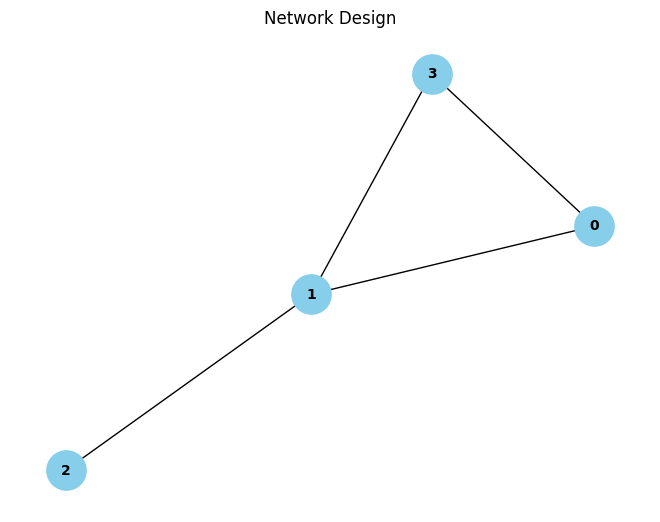

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(N, binary_edge_list):
    if(binary_edge_list == ""):
      return
    # Create an empty graph
    G = nx.Graph()

    # Add nodes to the graph
    for node in range(N):
        G.add_node(node)

    # Convert binary edge list to list of tuples representing edges
    edges = []
    idx = 0
    for i in range(N):
        for j in range(i+1, N):
            if binary_edge_list[idx] == '1':
                edges.append((i, j))
            idx += 1

    # Add edges to the graph
    G.add_edges_from(edges)

    # Draw the graph
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
    plt.title('Network Design')
    plt.show()

plot_graph(N, feas)


**Part 2: Efficient Algorithm**

In [2]:
#create list of every possible edges along with it's cost and reliability
#return tuple list of 3 items:
#1st is nodes of edge
#2nd is cost edge
#3rd is 1 - reliability of the edge, for easier sorting
def create_edge_info_list(cost_matrix, reliability_matrix):
  edge_info_list = []
  start = 1
  j = start + 1
  for i in range(len(cost_matrix)) :
    edge_info_list.append(((start, j), cost_matrix[i], 1-reliability_matrix[i]))
    j += 1
    if j > N:
      start += 1
      j = start + 1
  return edge_info_list

In [6]:
#create adjacency matrix of network using Kruskal's algorithm
#returns the resulting adjacency matrix, its cost and reliability,
#and a list of indices corresponding to the edges in the edge_info_list
def kruskal_alg(sorted_list, cost_limit):
  kruskal_matrix = [ [0]*N for i in range(N)]
  network_cost = 0
  network_reliability = 1
  connected_nodes = []
  edge_indices = []

  for i in range(len(sorted_list)) :
    curr_edge = (sorted_list[i])[0]
    if not(curr_edge[0] in connected_nodes) or not(curr_edge[1] in connected_nodes):
      network_cost += sorted_list[i][1]
      #if network cost exceeds maximum allowed cost, then the network is not feasible
      if network_cost > cost_limit :
        return [], 0, 0
      if not(curr_edge[0] in connected_nodes) :
        connected_nodes.append(curr_edge[0])
      if not(curr_edge[1] in connected_nodes) :
        connected_nodes.append(curr_edge[1])
      kruskal_matrix[curr_edge[0]-1][curr_edge[1]-1] = 1
      kruskal_matrix[curr_edge[1]-1][curr_edge[0]-1] = 1
      edge_indices.append(i)
      network_reliability *= 1 - sorted_list[i][2]

      if len(connected_nodes) == N :
        return kruskal_matrix, network_cost, network_reliability, edge_indices

  return [], 0, 0

In [39]:
#enhance network found with Kruskal's algorithm
from itertools import combinations

edge_info_list = create_edge_info_list(cost_matrix, reliability_matrix)
#sort edges by increasing number of cost
sorted_list = sorted(edge_info_list, key=lambda x: (x[1], x[2]))
kruskal_matrix, network_cost, network_reliability, kruskal_indices = kruskal_alg(edge_info_list, cost_limit)

if network_reliability == 0 :
  print(f"No possible network connections are feasible for cost limit of <= {cost_limit})")

else:
  print("Kruskal's algorithm has computed the following graph: ")
  print(kruskal_matrix)

  #find all possible combinations of edges within the cost limit
  print("Feasible enhanced networks: ")
  if network_cost < cost_limit:
    additional_indices = range(len(kruskal_indices),len(sorted_list))
    all_indices_comb = []
    #generate all combinations of additional edges
    for i in reversed(range(2,len(additional_indices))) :
      comb = combinations(additional_indices, i)
      all_indices_comb.extend(comb)

    selected_edges_indices = kruskal_indices.copy()
    enhanced_cost = network_cost
    enhanced_reliability = network_reliability

    #add combinations of edges, starting with largest combinations
    for combination in range(len(all_indices_comb)) :
      curr_item = all_indices_comb[combination]
      for item in range(len(curr_item)):
        enhanced_cost += curr_item[item]
      if enhanced_cost <= cost_limit :
        #TODO: calculate reliability
        binary_number=0
        print(f"{binary_number} has a reliability {enhanced_reliability} and cost {enhanced_cost}")
      if enhanced_reliability > network_reliability :
        network_reliability = enhanced_reliability
        network_cost = enhanced_cost
        selected_edges_indices.extend(all_indices_comb[combination])

    #add single edges
    for i in range(len(additional_indices)) :
      enhanced_cost += sorted_list[i][1]
      if enhanced_cost <= cost_limit :
        #calculate reliability
        binary_number=0
        print(f"{binary_number} has a reliability {enhanced_reliability} and cost {enhanced_cost}")
      if enhanced_reliability > network_reliability :
        network_reliability = enhanced_reliability
        network_cost = enhanced_cost
        selected_edges_indices.append(i)


    print(f"The most reliability network has reliability of {network_reliability} with total cost of {network_cost}")

Kruskal's algorithm has computed the following graph: 
[[0, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]
Feasible enhanced networks: 
(5, 6, 7, 8, 9, 10, 11, 12, 13)
0 has a reliability 0.7026050304 and cost 176.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
0 has a reliability 0.7026050304 and cost 186.0
The most reliability network has reliability of 0.7026050304 with total cost of 95.0


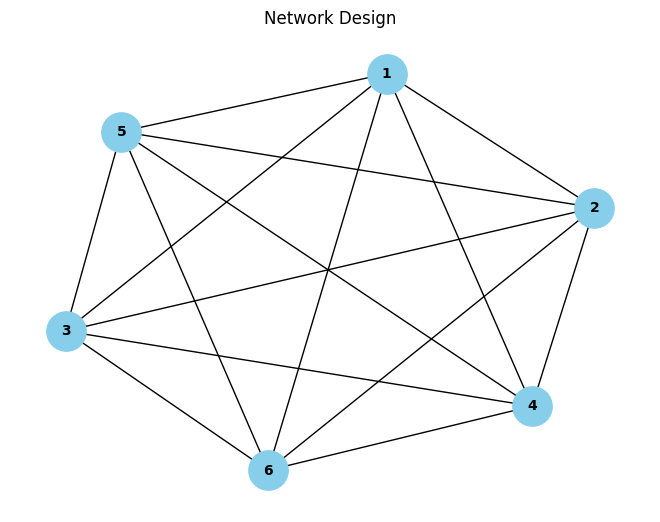

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Add edges from adjacency matrix to list of tuples representing edges
edges = []
for i in range(len(selected_edges_indices)):
  edges.append(sorted_list[i][0])

# Create an empty graph
G = nx.Graph()
# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
plt.title('Network Design')
plt.show()
